# 38일차
## 자연어 처리 딥러닝
### 단어 임베딩
- word2vec 알고리즘
- 한 단어는 단어집의 갯수만큼의 차원을 가진다. (원핫인코딩 형태)
- 이렇게 큰 단어의 차원을 줄여주는 것이 단어 임베딩이다.
- 단어 임베딩은 학습을 통해 얻을 수 있다.
<img src=http://th-mayer.de/pycon2018/img/one-hot-vs-embedding_adapted.png />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

### IMDb 데이터

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)
    # 가장 빈도가 높은 만개의 단어만 추출 (0~9999)
    # 0 : padding 용도
    # 1 : start character
    # 2 : out-of-vocabulary (10000번 이상의 단어를 표시)
    # 3 : 사용되지 않았음
    # 빈도가 높은 순서 대로 4번 부터 번호를 붙인다
    # C:\Users\사용자아이디\.keras\datasets\imdb.npz 에 저장됨

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\hanhe\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\hanhe\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [5]:
print(*X_train[0])
    # 단어들의 인덱스임 (1~9999 인 단어만 있음)
    # 첫번째 1은 start character
    # 2 는 10000개의 단어 중에 없는 단어임

1 14 22 16 43 530 973 1622 1385 65 458 4468 66 3941 4 173 36 256 5 25 100 43 838 112 50 670 2 9 35 480 284 5 150 4 172 112 167 2 336 385 39 4 172 4536 1111 17 546 38 13 447 4 192 50 16 6 147 2025 19 14 22 4 1920 4613 469 4 22 71 87 12 16 43 530 38 76 15 13 1247 4 22 17 515 17 12 16 626 18 2 5 62 386 12 8 316 8 106 5 4 2223 5244 16 480 66 3785 33 4 130 12 16 38 619 5 25 124 51 36 135 48 25 1415 33 6 22 12 215 28 77 52 5 14 407 16 82 2 8 4 107 117 5952 15 256 4 2 7 3766 5 723 36 71 43 530 476 26 400 317 46 7 4 2 1029 13 104 88 4 381 15 297 98 32 2071 56 26 141 6 194 7486 18 4 226 22 21 134 476 26 480 5 144 30 5535 18 51 36 28 224 92 25 104 4 226 65 16 38 1334 88 12 16 283 5 16 4472 113 103 32 15 16 5345 19 178 32


In [6]:
max([max(l) for l in X_train]), min([min(l) for l in X_train])

(9999, 1)

In [7]:
len_list = [len(l) for l in X_train]
max(len_list), min(len_list)

(2494, 11)

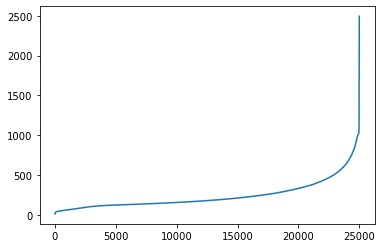

In [8]:
plt.plot(sorted(len_list))

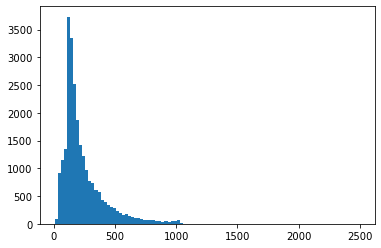

In [9]:
plt.hist(len_list, bins=100)
pass

In [10]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [11]:
np.bincount(y_train)

array([12500, 12500], dtype=int64)

- 단어사전 얻기(단어, 인덱스)
- C:\Users\사용자아이디\.keras\datasets\imdb_word_index.json
- X_train 의 인덱스 값에서 3을 빼줘야 word_index 의 인덱스 값에 해당함

In [12]:
w2i = keras.datasets.imdb.get_word_index()

In [13]:
len(w2i), type(w2i)

(88584, dict)

In [14]:
n = 0
for k in w2i:
    print(k, w2i[k])
    n += 1
    if n>=5: break

fawn 34701
tsukino 52006
nunnery 52007
sonja 16816
vani 63951


In [15]:
w2i['beautiful']

304

In [16]:
s='You are Jane'
[w2i[w.lower()]for w in s.split()]

[22, 23, 1013]

In [17]:
w2i['you'],w2i['are'],w2i['jane']

(22, 23, 1013)

In [18]:
i2w = {}

for k,v in w2i.items():
    i2w[v] = k
    
# i2w

In [19]:
i2w[1], i2w[88584] # i2w[0] 은 없음

('the', "'l'")

In [20]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [21]:
a=X_train[0]
for i in a:
    if i>3:
        print(i2w[i-3],end=' ')

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert is an amazing actor and now the same being director father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also to the two little boy's that played the of norman and paul they were just brilliant children are often left out of the list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole s

### 각 문장의 단어를 20개로 제한

In [22]:
from tensorflow.keras import preprocessing

In [23]:
preprocessing.sequence.pad_sequences([[1,2,3],[4,5,6],[1,2,3,4,5,6,7,8,9,10]], maxlen=5)

array([[ 0,  0,  1,  2,  3],
       [ 0,  0,  4,  5,  6],
       [ 6,  7,  8,  9, 10]])

In [24]:
X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=100)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=100)

In [25]:
print(X_train.shape)
print(X_train[0]) # 뒷부분만 남긴다 (100단어 보다 작은 경우 앞에 0을 채운다)

(25000, 100)
[1415   33    6   22   12  215   28   77   52    5   14  407   16   82
    2    8    4  107  117 5952   15  256    4    2    7 3766    5  723
   36   71   43  530  476   26  400  317   46    7    4    2 1029   13
  104   88    4  381   15  297   98   32 2071   56   26  141    6  194
 7486   18    4  226   22   21  134  476   26  480    5  144   30 5535
   18   51   36   28  224   92   25  104    4  226   65   16   38 1334
   88   12   16  283    5   16 4472  113  103   32   15   16 5345   19
  178   32]


In [26]:
for i in X_train[0]:
    if i>3: print(i2w[i-3], end=' ')
    else: print('X', end=' ')
    
# X_train 에서는 4번 부터 단어 번호가 붙고, 단어사전에는 1번 부터 번호를 붙임
# 그래서 3을 빼 주어야 해당 단어가 됨

cry at a film it must have been good and this definitely was also X to the two little boy's that played the X of norman and paul they were just brilliant children are often left out of the X list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all 

### 정리
- X_train 은 총 25,000개의 문장(Sequence) 이다.
- 한 문장(Sequence)는 100개의 단어로 이루어져 있다.
-각 단어에 해당하는 번호는 0~9999 로 총 1만개로 이루어져 있다.
-단어 번호(인덱스)가 정수 하나이지만 실제로는 1만개의 성분인 원핫인코딩 벡터로 생각해야 한다.
-(25000, 100, 10000)
### Keras 의 Embedding 적용

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [29]:
emb = Embedding(10, 2, input_length=10)
emb

In [30]:
ins = np.arange(10).reshape(1,10)
outs = emb(ins)
outs

<tf.Tensor: shape=(1, 10, 2), dtype=float32, numpy=
array([[[-0.02617663, -0.01630021],
        [-0.01920629,  0.00574011],
        [ 0.02037332,  0.04390952],
        [ 0.04319355,  0.01052926],
        [ 0.00987107,  0.04424996],
        [-0.03110714, -0.03383744],
        [-0.01316786,  0.02954621],
        [-0.02213224,  0.04363618],
        [-0.03952199,  0.01562515],
        [-0.02373856,  0.0272073 ]]], dtype=float32)>

In [31]:
emb.variables

[<tf.Variable 'embedding/embeddings:0' shape=(10, 2) dtype=float32, numpy=
 array([[-0.02617663, -0.01630021],
        [-0.01920629,  0.00574011],
        [ 0.02037332,  0.04390952],
        [ 0.04319355,  0.01052926],
        [ 0.00987107,  0.04424996],
        [-0.03110714, -0.03383744],
        [-0.01316786,  0.02954621],
        [-0.02213224,  0.04363618],
        [-0.03952199,  0.01562515],
        [-0.02373856,  0.0272073 ]], dtype=float32)>]

In [32]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=100))
    # 샘플당 단어 100개가 들어옴. 단어의 인덱스는 0~9999
    # 단어의 차원이 10000 에서 8로 줄어듬
    # 출력 차원은 (None, 100, 8) => 희소벡터를 밀집벡터로 변환
model.add(Flatten())
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

- Embedding 은 단어인덱스의 열(Sequence)를 입력받아 각 단어들을 줄어든 차원의 벡터로 출력한다 (word2vec)

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 105,665
Trainable params: 105,665
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6304 - acc: 0.6557 - val_loss: 0.3498 - val_acc: 0.8450
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.2657 - acc: 0.8955 - val_loss: 0.3376 - val_acc: 0.8506
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1885 - acc: 0.9333 - val_loss: 0.3604 - val_acc: 0.8490
Epoch 4/10
625/625 [==============================] - 1s 1ms/step - loss: 0.1372 - acc: 0.9597 - val_loss: 0.4063 - val_acc: 0.8454
Epoch 5/10
625/625 [==============================] - 1s 1ms/step - loss: 0.0841 - acc: 0.9796 - val_loss: 0.4871 - val_acc: 0.8356
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.0403 - acc: 0.9936 - val_loss: 0.5406 - val_acc: 0.8358
Epoch 7/10
625/625 [==============================] - 1s 1ms/step - loss: 0.0183 - acc: 0.9983 - val_loss: 0.6060 - val_acc: 0.8320
Epoch 8/10
625/625 [==============================] - 1s 1ms/step - loss: 0.

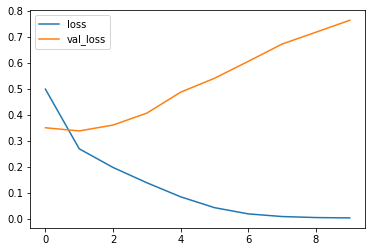

In [35]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

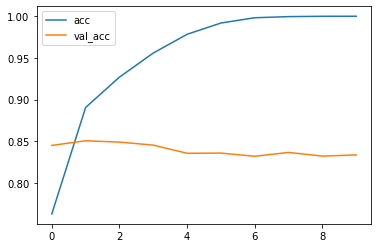

In [36]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

### 가중치 분석

In [38]:
ws = model.get_weights()

In [39]:
ws[0].shape # 단어 만개에 대한 가중치 (또는 특성 벡터)

(10000, 8)

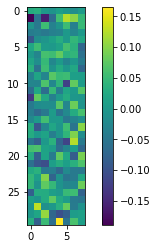

In [40]:
plt.imshow(ws[0][:30])
plt.colorbar()

- 비슷한 패턴의 행들에 해당하는 단어들은 문장에서 같이 등장할 가능성이 크다.
- 위에서 14번과 16번 단어는 비슷한 패턴이다

In [41]:
i2w[14-3], i2w[16-3], i2w[20-3]

('this', 'was', 'movie')

In [42]:
i2w[21-3]

'but'

In [43]:
mat = ws[0]
n = w2i['excellent'] + 3

distance = []

for i in range(10000):
    distance.append(((mat[n]-mat[i])**2).sum())
    
result = np.argsort(distance)[-10:]
result

array([5672, 3316,  373, 3262, 3179, 3121,  437, 4063,  249, 1149],
      dtype=int64)

In [44]:
for i in result:
    print(i2w[i-3])

artsy
incoherent
awful
boredom
mst3k
wasting
waste
unwatchable
worst
pointless


### GloVe 적용
- glove 는 스탠포드 대학교에서 만든 2014년 영문 위키피디아를 사용하여 사전에 계산한 임베딩임
- 구글의 Word2vec 와 함께 인기가 많다
- https://nlp.stanford.edu/projects/glove
- https://bit.ly/2NIJwdb 에서 glove.6B.zip 다운로드 (이 중 glove.6B.100d.txt 사용)
- 단어 40만개, 100차원

In [47]:
f = open('glove.6B.100d.txt', encoding='utf8')
s = f.readline()
s2 = f.readline()
f.close()
s

'the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062\n'

In [48]:
s2

', -0.10767 0.11053 0.59812 -0.54361 0.67396 0.10663 0.038867 0.35481 0.06351 -0.094189 0.15786 -0.81665 0.14172 0.21939 0.58505 -0.52158 0.22783 -0.16642 -0.68228 0.3587 0.42568 0.19021 0.91963 0.57555 0.46185 0.42363 -0.095399 -0.42749 -0.16567 -0.056842 -0.29595 0.26037 -0.26606 -0.070404 -0.27662 0.15821 0.69825 0.43081 0.27952 -0.45437 -0.33801 -0.58184 0.22364 -0.5778 -0.26862 -0.20425 0.56394 -0.58524 -0.14365 -0.64218 0.0054697 -0.35248 0.16162 1.1796 -0.47674 -2.7553 -0.1321 -0.047729 1.0655 1.1034 -0.2208 0.18669 0.13177 0.15117 0.7131 -0.35215 0.91348 0.61783 0.70992 0.23955 -0.14571 -0.37859 -0.045959 -0.47368 0.2385 0.20536 -0.18996 0.32507 -1.1112 -0.36341 0.98679 -0.084776 -0.54008 0.11726 -1.0194 -0.24424 0.12771 0.013884 0.080374 -0.35414 0.34951 -0.7226 0.37549 0.4441 -0.99059 0.61214 -0.35111 -0.83155 0.45293 0.082577\n'

In [49]:
word = []
vec = []

f = open('glove.6B.100d.txt', encoding='utf8')
for line in f:
    l = line.strip().split()
    word.append(l[0])
    vec.append([float(n) for n in l[1:]])
    break

In [50]:
word[0], len(vec[0])

('the', 100)

In [51]:
n = 0

f = open('glove.6B.100d.txt', encoding='utf8')
for line in f:
    n += 1
f.close()

n # 40만 개의 단어

400000

## 자연어 처리 딥러닝
### RNN (순환신경망) 과 LSTM
- 연속된 데이터 묶음을 처리한다.
-하나의 데이터 묶음은 순서를 가진다. (앞과 뒤를 구분)
-이러한 데이터 묶음을 시퀀스(Sequence) 또는 시계열데이터 라고 한다.
-연속된 단어들로 이루어진 문장, 몇일 간의 종가로 이루어진 주식 가격 등
-RNN : Recurrent Neural Network

### IMDb 데이터

In [5]:
from tensorflow.keras.datasets import imdb

In [6]:

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\hanhe\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\hanhe\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [8]:
w2i = imdb.get_word_index()
len(w2i)

88584

### 문장의 단어수를 500개로 제한

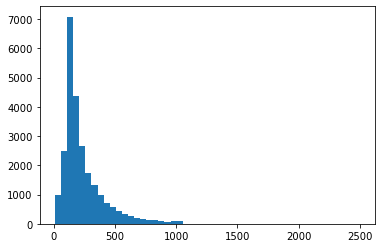

In [9]:
doc_len = [len(x) for x in X_train]
plt.hist(doc_len, bins=50)
pass

In [10]:
from tensorflow.keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train, maxlen=500) # 문장당 단어수가 500개를 넘기면 앞부분을 자른다
X_test = sequence.pad_sequences(X_test, maxlen=500)

- 문장의 뒤에서 단어 500개를 가져온다.
-문장이 짧은 경우 앞부분을 0 으로 채운다.

### Sequence 개념
- 한 문장은 순차적인 단어들로 이루어져 있다.
-이러한 연속적인 단어들로 이루어진 문장과 같은 것을 Sequence 라고 한다.
-Sequence 의 한 항목은 복수의 속성값을 가질 수 있다
>- 한 문장 : [1,31,27,5]
>- 한 단어 : 31 => [0,0,...,1,...,0,0]

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [12]:
model = Sequential()
model.add(Embedding(10000, 32, input_length=500))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                6208      
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________


In [14]:
32*64 + 64*64 + 64 # SimpleRNN 가중치 수

6208

### 모델 설명
- Embedding 은 단어번호들을 입력으로 받는다.
>10000 => 단어집의 총 단어수 <br>
> 32 => 10000 차원을 32 차원으로 줄임<br>
> 500 => 한 문장에 속하는 단어수<br>
> (None,500) => (None,500,10000) => (None,500,32)<br>

- SimpleRNN 은 연속된 단어들(Sequence)를 입력받는다.
> (None,500,32) => (None,64)<br>
> SimpleRNN(64) 에서 64는 출력 차원을 의미한다.

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=2, batch_size=128, validation_split=0.2)

Epoch 1/2
157/157 [==============================] - 18s 107ms/step - loss: 0.6823 - acc: 0.5577 - val_loss: 0.5257 - val_acc: 0.7468
Epoch 2/2
157/157 [==============================] - 18s 114ms/step - loss: 0.4064 - acc: 0.8241 - val_loss: 0.4025 - val_acc: 0.8252


In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 20s 120ms/step - loss: 0.3123 - acc: 0.8796 - val_loss: 0.3664 - val_acc: 0.8466
Epoch 2/10
157/157 [==============================] - 19s 122ms/step - loss: 0.2478 - acc: 0.9061 - val_loss: 0.3784 - val_acc: 0.8436
Epoch 3/10
157/157 [==============================] - 20s 126ms/step - loss: 0.2108 - acc: 0.9213 - val_loss: 0.3979 - val_acc: 0.8464
Epoch 4/10
157/157 [==============================] - 22s 138ms/step - loss: 0.1825 - acc: 0.9339 - val_loss: 0.4259 - val_acc: 0.8400
Epoch 5/10
157/157 [==============================] - 22s 138ms/step - loss: 0.1577 - acc: 0.9437 - val_loss: 0.4435 - val_acc: 0.8458
Epoch 6/10
157/157 [==============================] - 22s 137ms/step - loss: 0.1256 - acc: 0.9593 - val_loss: 0.4762 - val_acc: 0.8396
Epoch 7/10
157/157 [==============================] - 21s 137ms/step - loss: 0.1097 - acc: 0.9674 - val_loss: 0.5235 - val_acc: 0.8378
Epoch 8/10
157/157 [==============================] - 2

Text(6, 0.87, 'val_acc_max = 0.8465999960899353')

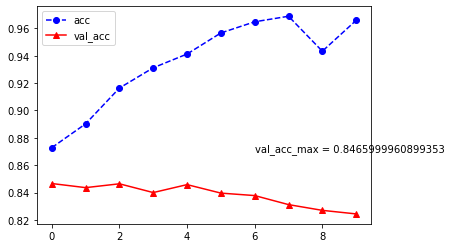

In [17]:
h = history.history
plt.plot(h['acc'], 'bo--')
plt.plot(h['val_acc'], 'r^-')
plt.legend(['acc', 'val_acc'])
plt.text(6,0.87,'val_acc_max = '+ str(max(h['val_acc'])))

Text(3, 0.3, 'val_loss_min = 0.36636829376220703')

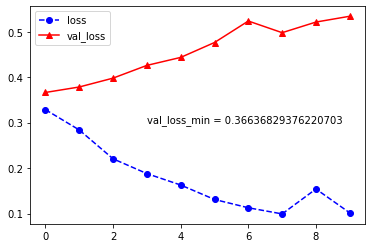

In [18]:
plt.plot(h['loss'], 'bo--')
plt.plot(h['val_loss'], 'r^-')
plt.legend(['loss', 'val_loss'])
plt.text(3,0.3,'val_loss_min = '+ str(min(h['val_loss'])))

### RNN 을 겹쳐서 사용하기
- return_sequence 옵션을 사용하면 각 RNN Cell 의 출력값을 반환한다.
-이 출력값을 입력으로 받는 RNN 층을 위에 쌓을 수 있다.

In [19]:
model = Sequential()
model.add(Embedding(10000, 32, input_length=500))
model.add(SimpleRNN(32, return_sequences=True)) # return_sequences=True!!!
model.add(SimpleRNN(16, return_sequences=True)) # return_sequences=True!!!
model.add(SimpleRNN(16))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 500, 32)           2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 500, 16)           784       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 323,409
Trainable params: 323,409
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 37s 230ms/step - loss: 0.6961 - acc: 0.5068 - val_loss: 0.5906 - val_acc: 0.6854
Epoch 2/10
157/157 [==============================] - 39s 248ms/step - loss: 0.4681 - acc: 0.7819 - val_loss: 0.3755 - val_acc: 0.8554
Epoch 3/10
157/157 [==============================] - 39s 251ms/step - loss: 0.2990 - acc: 0.8814 - val_loss: 0.4086 - val_acc: 0.8384
Epoch 4/10
157/157 [==============================] - 41s 260ms/step - loss: 0.1743 - acc: 0.9347 - val_loss: 0.4844 - val_acc: 0.7872
Epoch 5/10
157/157 [==============================] - 40s 258ms/step - loss: 0.1026 - acc: 0.9649 - val_loss: 0.4991 - val_acc: 0.8304
Epoch 6/10
157/157 [==============================] - 41s 260ms/step - loss: 0.0453 - acc: 0.9867 - val_loss: 0.9021 - val_acc: 0.7296
Epoch 7/10
157/157 [==============================] - 41s 260ms/step - loss: 0.0258 - acc: 0.9917 - val_loss: 0.8430 - val_acc: 0.7704
Epoch 8/10
157/157 [==============================] - 4

Text(6, 0.87, 'val_acc_max = 0.855400025844574')

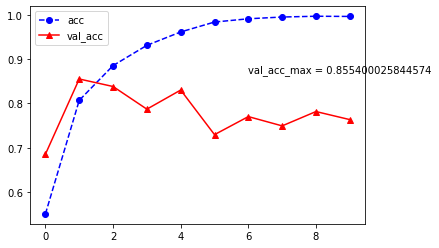

In [22]:
h = history.history
plt.plot(h['acc'], 'bo--')
plt.plot(h['val_acc'], 'r^-')
plt.legend(['acc', 'val_acc'])
plt.text(6,0.87,'val_acc_max = '+ str(max(h['val_acc'])))

Text(3, 0.3, 'val_loss_min = 0.37546637654304504')

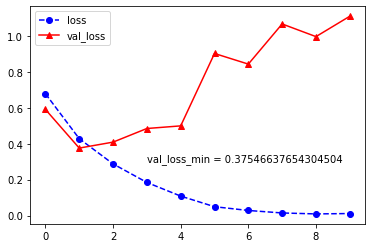

In [23]:
plt.plot(h['loss'], 'bo--')
plt.plot(h['val_loss'], 'r^-')
plt.legend(['loss', 'val_loss'])
plt.text(3,0.3,'val_loss_min = '+ str(min(h['val_loss'])))

### 그래디언트 소실 문제
- RNN 은 하나의 층에서도 반복적인 RNN Cell 을 적용하므로, 실제로는 많은 층을 거치게 된다.
-최상위의 손실값을 조금씩 아래로 나누어 주어 기울기의 가중치를 부여하는 것이 신경망의 핵심 알고리즘인 역전파(Backpropagation) 이다.
-층을 많이 거치므로 초기층들의 영향력은 점점 줄어들게 된다. 즉, 문장에서 처음 나오는 단어들은 거의 무시되는 경향이 생긴다.
-이러한 문제를 Vanishing Gradient Problem 이라고 부른다.
-그래디언트 소실 문제를 해결하기 위해 LSTM 과 GRU 가 제안되었고, SimpleRNN 은 거의 사용되지 않는다.

### LSTM 적용
- Long Short Term Memory
-그래디언트 소실 문제(Vanishing gradient problem) 을 해결하기 위해, 이전 타임의 영향력을 좀 더 키운 것이다.
-LSTM 의 역할 => 과거 정보를 나중에 다시 주입하여 그래디언트 소실 문제를 해결

In [ ]:
from tensorflow.keras.layers import LSTM